## Predicting Titanic Survival

In this first project, I'm going to sharpen my Data Science skills by starting with a basic and classic classification problem: Predicting who is going to survive
a Titanic disaster.

So firstly I have imported some basic libraries that I know I will use for sure, such as pyplot (from matplotlib), pandas for dataframe manipulation and numpy for arrays

In [272]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Below some less common classes that I will add as I write the code (mainly scikit learn for now)

In [274]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

So, the data was collected from Kaggle, and I downloaded and imported a csv file. I had opened the sheet and saw that Cabin was a bad column in advance so I dropped the column before even opening it here

In [4]:
df = pd.read_csv("train.csv")

In [5]:
df = df.drop(columns="Cabin", axis=1)

So below are the first 5 rows of our data

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


From a first glance, I got interested in getting some insight about the age of passangers in the ship. So I plotted the following histogram

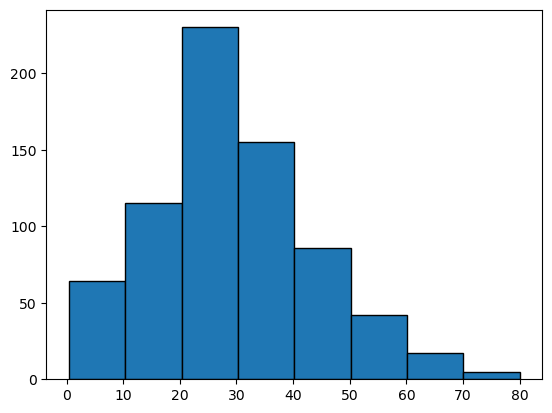

In [15]:
plt.hist(df["Age" & ], bins=8, edgecolor="black");

We can see that most people fall in the 20-40's, with very few people older than 70, and a decent proportion of people below 20 and between 40-60.

Then, I wanted to see the age of survivors, so I made the following adaptation to the data

In [21]:
mask = (df["Survived"] == 1)

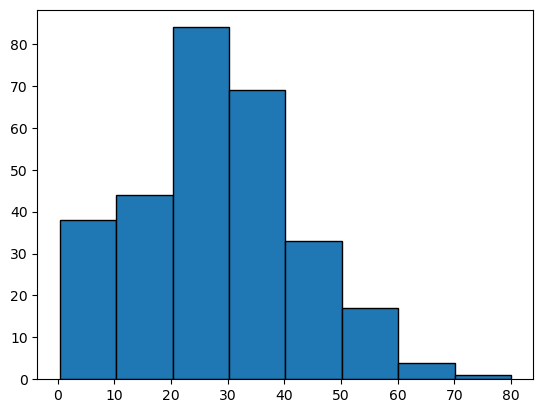

In [25]:
plt.hist(df[mask]["Age"], bins=8, edgecolor="black");

In [285]:
df["Age"].mean()

29.64209269662921

From this second histogram, we can see that the proportion by age seems consistent with the previous histogram from the average age (29 yo) and upwards, but there's
a significant change in proportion in relation to children who have survived, which seems to be above 60%, considering both graphs

##

Now I want to see how sex affected the proportion of survivors:

We can see that we have almost 65% of males but only 31% of the survivors were males, that is, although there were less women, they were among the great majority of survivors

In [35]:
df["Sex"].value_counts(normalize=True)

Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64

In [37]:
df[mask]["Sex"].value_counts(normalize=True)

Sex
female    0.681287
male      0.318713
Name: proportion, dtype: float64

So just for reference, let's see how many female children survived compared to how many old males

In [340]:
mask_yf_s = (df["Age"] < 12) & (df["Sex"] == "female") & (df["Survived"] == 1)
mask_yf = (df["Age"] < 12) & (df["Sex"] == "female")
proportion_yf_s = df[mask_yf_s].count()/df[mask_yf].count()
proportion_yf_s["Survived"]

0.59375

In [344]:
mask_om_s = (df["Age"] > 60) & (df["Sex"] == 1) & (df["Survived"] == 1)
mask_om = (df["Age"] > 60) & (df["Sex"] == 1)
proportion_om_s = df[mask_om_s].count()/df[mask_om].count()
proportion_om_s["Survived"]

0.10526315789473684

So, as we guessed about proportions, we had 59% of young females surviving, and 10% of old males surviving

Now let's analyze survivors by class, firstly we can see that class 3 was the majority at first, but after the disaster, the proportion dropped from 55% down to 34%, whereas class 1's proportion increased from 24% to 34%, and class 2 increased from 20% to 25%

In [41]:
df["Pclass"].value_counts(normalize=True)

Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64

In [43]:
df[mask]["Pclass"].value_counts(normalize=True)

Pclass
1    0.397661
3    0.347953
2    0.254386
Name: proportion, dtype: float64

So now, I want to see how complete is the dataset, so let's do some counting of rows and of unique values in each category

df.count()

In [59]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

From the observed, Age seems to be lacking data, and PassengerId, Name, Ticket and Fare seem significantly great to be used for classification purposes, so let's just drop them

In [61]:
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Fare"], axis=1)

In [63]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


Now, there are some data as strings, so let's make them integers, for classification purposes

In [67]:
df = df.replace({"female": 0, "male":1})

C:\Users\svrse\AppData\Local\Temp\ipykernel_15192\2834339859.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"female": 0, "male":1})


In [69]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,S
1,1,1,0,38.0,1,0,C
2,1,3,0,26.0,0,0,S
3,1,1,0,35.0,1,0,S
4,0,3,1,35.0,0,0,S


In [71]:
df = df.replace({"C": 1, "Q": 2, "S": 3})
df.head()

C:\Users\svrse\AppData\Local\Temp\ipykernel_15192\4227658270.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"C": 1, "Q": 2, "S": 3})


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,3.0
1,1,1,0,38.0,1,0,1.0
2,1,3,0,26.0,0,0,3.0
3,1,1,0,35.0,1,0,3.0
4,0,3,1,35.0,0,0,3.0


now, let's drop some NA columns and see how many rows we get as a result

In [73]:
df = df.dropna()

In [79]:
df.count()

Survived    712
Pclass      712
Sex         712
Age         712
SibSp       712
Parch       712
Embarked    712
dtype: int64

Ok, that was good! Now let's split our dataset into training and validation sets

In [83]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]
y = df['Survived']

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,3.0
1,1,1,0,38.0,1,0,1.0
2,1,3,0,26.0,0,0,3.0
3,1,1,0,35.0,1,0,3.0
4,0,3,1,35.0,0,0,3.0


So our first model will be a Gradient Boosting Classifier, and let's see how well it performs with some default parameters

In [159]:
gb_model = GradientBoostingClassifier(
    n_estimators=100, 
    learning_rate=0.1,    
    max_depth=3,         
    random_state=42
)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [163]:
y_pred = gb_model.predict(X_test)

In [167]:
accuracy_score(y_test, y_pred)

0.7622377622377622

Ok, not so great, but not so bad

Ok, let me try a default Random Forest Classifier now, and see how it performs 

In [251]:
rf_model = RandomForestClassifier(
    n_estimators=50,      # number of trees
    max_depth=3,        # can be tuned
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=50, random_state=42)

In [247]:
y_pred2 = rf_model.predict(X_test)

In [249]:
accuracy_score(y_test, y_pred2)

0.7902097902097902

Ok, that was better, so let's use it to improve our model with Grid Search, and tune for the best parameters

In [261]:
rf_param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [5, 8, 10, None],  
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]  
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, scoring='accuracy', n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)

print(f"Best parameters: {rf_grid.best_params_}")
print(f"Score: {rf_grid.best_score_:.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Score: 0.8172


In [263]:
y_pred3 = rf_grid.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred3)

0.8111888111888111

I guess we have finally arrived at a decent result!, so now we can use our test dataset and run it on Kaggle

Written by Sergio Victor svrsenfp@gmail.com